# Plotting Dynamic Time Warping

Plan here is to plot the dynamic time warping graphs that show the identification of the different points. The input data is three csv's found in this directory.



In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# EB added in an attempt to add dates to x axoos
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import datetime as DT

In [2]:
path = '/Users/elliebloom/Desktop/Masters/Project/Analysis/Time_series_analysis/DTW_data_plots/'

In [3]:
mobs = pd.read_csv(f'{path}/mob_series.csv')
prev = pd.read_csv(f'{path}/prev_series.csv')
dtwi = pd.read_csv(f'{path}/dtw_indices.csv')

In [72]:
mobs, prev, dtwi

(       series      type date_series
 0    0.259897  mobility  2020-05-04
 1    0.244406  mobility  2020-05-05
 2    0.246127  mobility  2020-05-06
 3    0.249570  mobility  2020-05-07
 4    0.251291  mobility  2020-05-08
 ..        ...       ...         ...
 146  0.609294  mobility  2020-09-27
 147  0.614458  mobility  2020-09-28
 148  0.616179  mobility  2020-09-29
 149  0.614458  mobility  2020-09-30
 150  0.612737  mobility  2020-10-01
 
 [151 rows x 3 columns],
        series  type date_series
 0    0.173598  prev  2020-05-04
 1    0.155382  prev  2020-05-05
 2    0.138641  prev  2020-05-06
 3    0.123616  prev  2020-05-07
 4    0.109995  prev  2020-05-08
 ..        ...   ...         ...
 146  0.088728  prev  2020-09-27
 147  0.088916  prev  2020-09-28
 148  0.088978  prev  2020-09-29
 149  0.088999  prev  2020-09-30
 150  0.089114  prev  2020-10-01
 
 [151 rows x 3 columns],
      mob_index  prev_index
 0            1           1
 1            1           2
 2            1       

In [21]:
mob_ind = np.asarray(dtwi['mob_index'])
prev_ind = np.asarray(dtwi['prev_index'])

In [132]:
def plot_timewarping(
    mobility_series: pd.DataFrame, 
    prev_series: pd.DataFrame, 
    tw_indices: pd.DataFrame,
    plot_sparcity=5
):
    """
        Assumes that tw_indcies are in column order mobility then prevalence
    """
    inds = np.asarray(tw_indices)
    fig, ax = plt.subplots()
    mobility_series['series'].plot(label='Mobility')
    prev_series['series'].plot(label='Prevs')
    c = 0
    for indices in inds:
        x_data = [indices[0]-1, indices[1]-1]
        y_data = [mobility_series['series'][indices[0]-1], prev_series['series'][indices[1]-1]]
        if c%plot_sparcity == 0:
            plt.plot(x_data, y_data, 'gray', linestyle='--')
        c += 1
    plt.legend()
    plt.ylabel('Normalised time-series')
    #plt.xticks(list(mobility_series['series']), list(mobility_series['date_series']))
    
    start_date = np.min(mobility_series['date_series'])
    start_date = DT.datetime.strptime(start_date, "%Y-%m-%d").date()
    #start_date =  DT.datetime.strftime(start_date, "%d-%m-%Y") 

    
    def todate(x, pos, start=start_date):
        return start+DT.timedelta(days=x)
    fmt = ticker.FuncFormatter(todate)
    ax.xaxis.set_major_formatter(fmt)
    fig.autofmt_xdate(rotation=45)  
    
    return fig

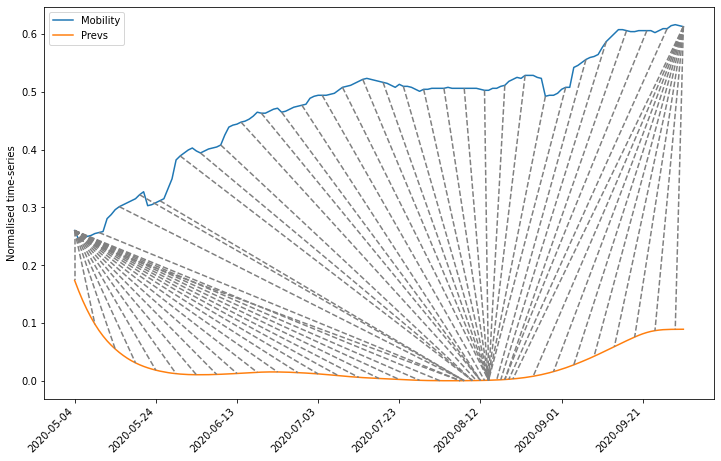

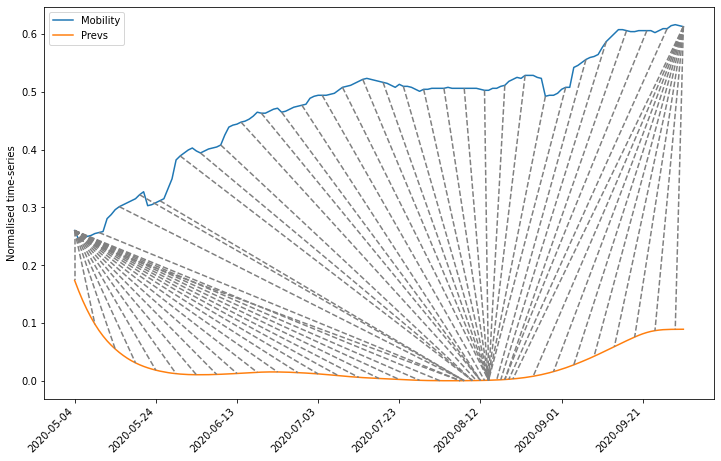

In [133]:
plot_timewarping(mobs, prev, dtwi)

In [6]:
inds = np.zeros((mob_ind.size, 2))
for i in range(inds.shape[0]):
    inds[i][0] = mob_ind[i]
    inds[i][1] = prev_ind[i]

In [7]:
mob_series = np.asarray(mobs['series'])
prev_series = np.asarray(prev['series'])

inds = inds.astype(int)

plt.rcParams["figure.figsize"]

plt.rcParams["figure.figsize"]=(12,8)

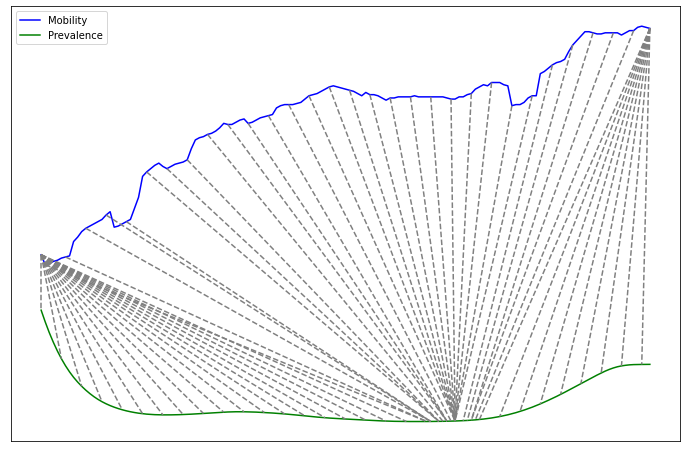

In [8]:
plt.plot(mob_series, 'blue')
plt.plot(prev_series, 'green')
plt.legend(["Mobility", "Prevalence"])
c = 0
for indices in inds:
    x_data = [indices[0]-1, indices[1]-1]
    y_data = [mob_series[indices[0]-1], prev_series[indices[1]-1]]
    if c%5 == 0:
        plt.plot(x_data, y_data, 'gray', linestyle='--')
    c += 1
# Next 3 lines remove axis labels   
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()

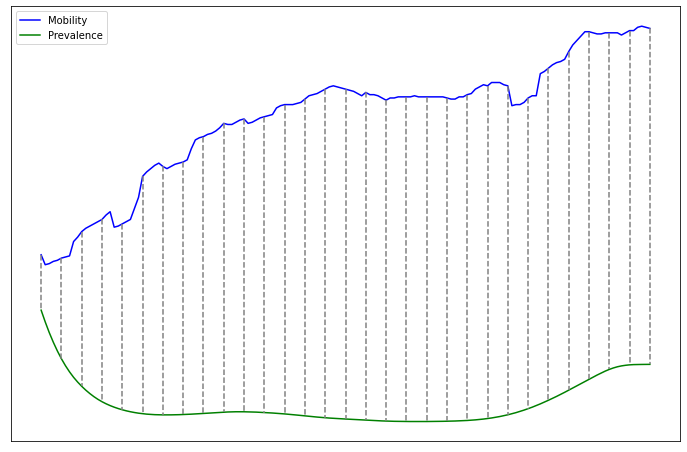

In [9]:
plt.plot(mob_series, 'blue')
plt.plot(prev_series, 'green')
plt.legend(["Mobility", "Prevalence"])
c = 0
for index in range(mob_series.shape[0]):
    x_data = [index, index]
    y_data = [mob_series[index], prev_series[index]]
    if c%5 == 0:
        plt.plot(x_data, y_data, 'gray', linestyle='--')
    c += 1
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()